In [29]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
# Data Import
df = pd.read_csv('../data/processed/zones_data_11262015.csv')
df.head()

,pu_time,do_time,pu_nbrhood,do_nbrhood,pass_count,distance,fare,tip,total,payment_type,trip_type
0,11/26/2015 10:17:39 PM,11/26/2015 10:21:03 PM,QN29,QN21,6,0.90,5.0,0.00,6.30,2,1
1,11/26/2015 05:48:01 PM,11/26/2015 05:57:20 PM,MN40,MN17,1,1.94,9.5,0.00,10.30,2,1
2,11/26/2015 06:34:49 PM,11/26/2015 06:48:47 PM,MN09,BX39,1,3.08,12.5,0.00,13.30,2,1
3,11/26/2015 02:25:56 AM,11/26/2015 02:47:10 AM,BK68,BK78,3,3.94,17.0,0.00,18.30,2,1
4,11/26/2015 02:42:24 PM,11/26/2015 02:47:39 PM,BK75,BK61,1,0.50,5.0,1.15,6.95,1,1


In [45]:
# Create new column which concatenates pickup and dropoff neighbours to create unique trip code
df['trip'] = df.pu_nbrhood + df.do_nbrhood
df.head()

,pu_time,do_time,pu_nbrhood,do_nbrhood,pass_count,distance,fare,tip,total,payment_type,trip_type,trip
0,11/26/2015 10:17:39 PM,11/26/2015 10:21:03 PM,QN29,QN21,6,0.90,5.0,0.00,6.30,2,1,QN29QN21
1,11/26/2015 05:48:01 PM,11/26/2015 05:57:20 PM,MN40,MN17,1,1.94,9.5,0.00,10.30,2,1,MN40MN17
2,11/26/2015 06:34:49 PM,11/26/2015 06:48:47 PM,MN09,BX39,1,3.08,12.5,0.00,13.30,2,1,MN09BX39
3,11/26/2015 02:25:56 AM,11/26/2015 02:47:10 AM,BK68,BK78,3,3.94,17.0,0.00,18.30,2,1,BK68BK78
4,11/26/2015 02:42:24 PM,11/26/2015 02:47:39 PM,BK75,BK61,1,0.50,5.0,1.15,6.95,1,1,BK75BK61


In [79]:
trip_info = df.groupby(['trip']).count().reset_index()
trip_count = trip_info.loc[:, ['trip', 'total']].set_index('trip').sort_values(by='total', ascending=False)
trip_count

keep_trips = trip_count[trip_count.total>25]
keep_trips = pd.Series(keep_trips.index).as_matrix()
keep_trips

array(['QN70QN70', 'QN28QN28', 'QN29QN29', 'QN29QN28', 'MN34XX00',
       'BK73BK73', 'MN03MN03', 'MN11MN03', 'MN11MN34', 'MN33MN34',
       'XX00XX00', 'MN34MN12', 'MN34MN34', 'QN70QN72', 'QN29QN26',
       'BK73BK76', 'MN03MN11', 'MN34MN11', 'MN34MN33', 'QN17QN17',
       'BK61BK61', 'MN33XX00', 'BK37BK37', 'MN03MN34', 'MN34MN03',
       'QN29QN25', 'MN09MN12', 'QN72QN72', 'MN11MN11', 'QN70QN63',
       'QN28QN29', 'MN11MN12', 'MN11XX00', 'MN36MN36', 'QN70QN71',
       'BK73XX00', 'QN70QN31', 'QN28QN63', 'QN63QN70', 'QN63QN28',
       'QN31QN31', 'QN70XX00', 'QN29QN63', 'QN70QN28', 'QN63QN29',
       'MN09XX00', 'QN72QN70', 'QN28QN26', 'MN09MN34', 'MN03XX00',
       'MN03MN04', 'MN09MN09', 'BK38BK37', 'BK38BK38', 'BK73BK90',
       'BK68BK38', 'MN33MN33', 'MN33MN12', 'MN11MN09', 'MN36XX00',
       'BK38XX00', 'MN04MN36', 'BK76BK73', 'QN29QN50', 'BK75BK61',
       'QN63QN31', 'BK73BK75', 'MN33MN03', 'QN63QN63', 'MN33MN40',
       'QN31XX00', 'MN11MN04', 'BK38BK33', 'BK68BK69', 'BK73BK

In [82]:
# Reduce data set to only busy routes
busy_routes = df.loc[df.trip.isin(keep_trips)]
busy_routes.head()

,pu_time,do_time,pu_nbrhood,do_nbrhood,pass_count,distance,fare,tip,total,payment_type,trip_type,trip
0,11/26/2015 10:17:39 PM,11/26/2015 10:21:03 PM,QN29,QN21,6,0.90,5.0,0.00,6.30,2,1,QN29QN21
3,11/26/2015 02:25:56 AM,11/26/2015 02:47:10 AM,BK68,BK78,3,3.94,17.0,0.00,18.30,2,1,BK68BK78
4,11/26/2015 02:42:24 PM,11/26/2015 02:47:39 PM,BK75,BK61,1,0.50,5.0,1.15,6.95,1,1,BK75BK61
5,11/26/2015 10:47:50 PM,11/26/2015 10:56:27 PM,QN17,QN18,1,1.76,8.5,0.00,9.80,1,1,QN17QN18
7,11/26/2015 06:51:15 PM,11/26/2015 07:04:56 PM,MN09,MN17,1,3.81,13.5,3.58,17.88,1,1,MN09MN17


In [83]:
# Group data by trips and find averages
avg_tip = busy_routes.groupby(['trip']).mean().reset_index()
avg_tip.head()

,trip,pass_count,distance,fare,tip,total,payment_type,trip_type
0,BK09BK33,1.432432,1.212297,6.121622,0.547568,7.584054,1.621622,1.000000
1,BK09BK37,1.485714,2.354571,10.257143,1.260000,12.431429,1.400000,1.000000
2,BK09BK38,1.509804,1.273529,6.558824,0.990196,8.466667,1.431373,1.000000
3,BK09MN24,1.518519,2.799259,13.259259,1.797037,16.154074,1.333333,1.000000
4,BK09XX00,1.875000,8.776964,27.821429,4.157857,33.081964,1.321429,1.017857


Text(0,0.5,'Average Tips')

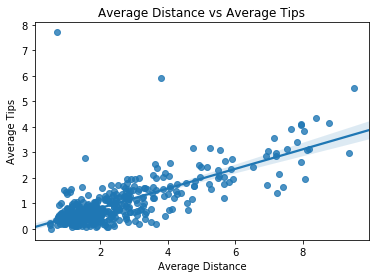

In [84]:
sns.regplot(x="distance", y="tip", data=avg_tip)
plt.title('Average Distance vs Average Tips')
plt.xlabel('Average Distance')
plt.ylabel('Average Tips')